In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
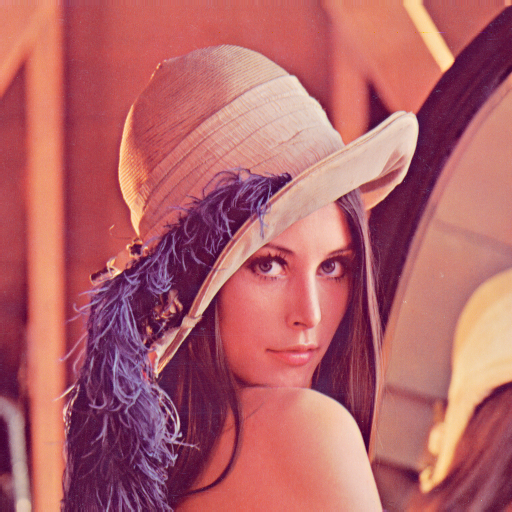

In [24]:
# display image in colab
image_colored = Image.open("/content/drive/MyDrive/BIG DATA/Lenna_(test_image).png")
image_colored=np.array(image_colored)
display (image_colored)

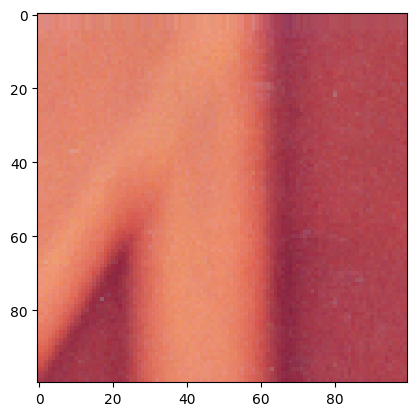

In [25]:
top_left=image_colored[:100,:100]
plt.imshow(top_left)

In [26]:
r=image_colored[:,:,0]
g=image_colored[:,:,1]
b=image_colored[:,:,2]

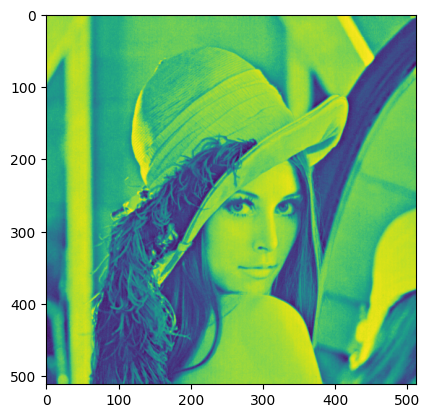

In [28]:
plt.imshow(r)

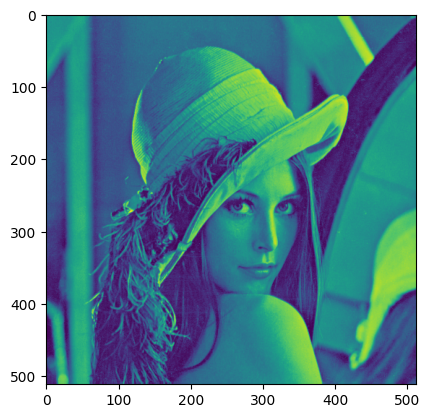

In [29]:
plt.imshow(g)

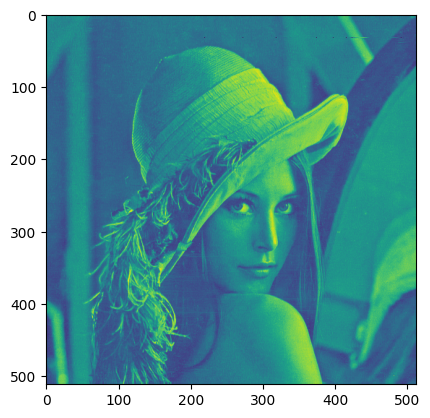

In [30]:
plt.imshow(b)

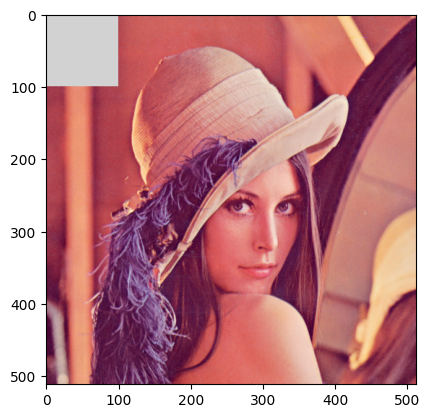

In [31]:
modified_arr=image_colored
modified_arr[:100,:100]=210
plt.imshow(modified_arr)

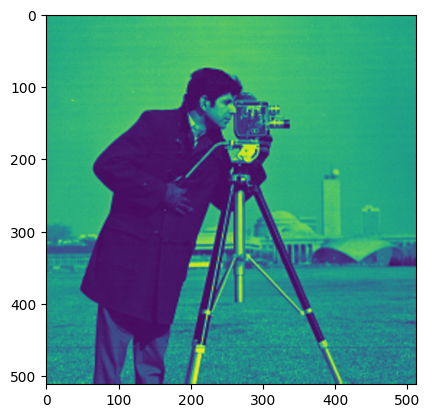

In [33]:
grey_img=Image.open("/content/drive/MyDrive/BIG DATA/cameraman.png")
greyimg_arr=np.array(grey_img)
greyimg_arr=np.array(grey_img)
plt.imshow(greyimg_arr)

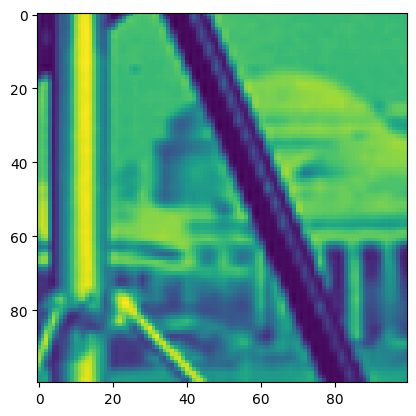

In [34]:
(row,column)=greyimg_arr.shape
mid=int(row/2)
cropped=greyimg_arr[mid:mid+100,mid:mid+100]
plt.imshow(cropped)

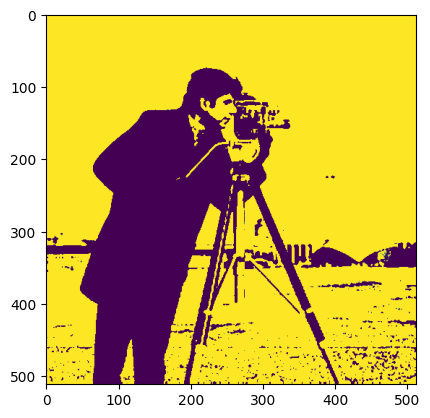

In [35]:
thresholdimg=np.where(greyimg_arr<100,0,np.where(greyimg_arr > 100, 255, greyimg_arr))
plt.imshow(thresholdimg)

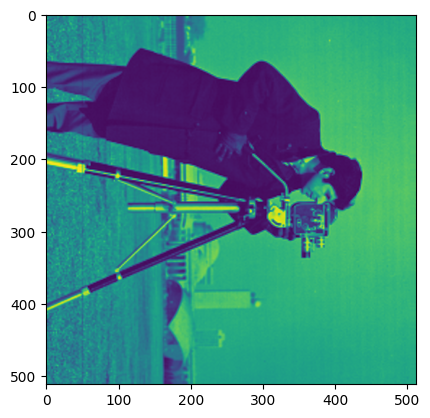

In [36]:
rotated=grey_img.rotate(-90)
plt.imshow(rotated)

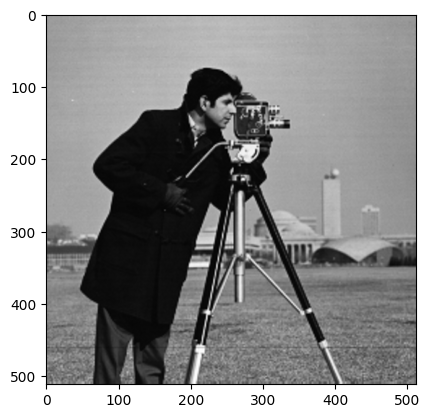

In [37]:
rgbimg=grey_img.convert('RGB')
plt.imshow(rgbimg)

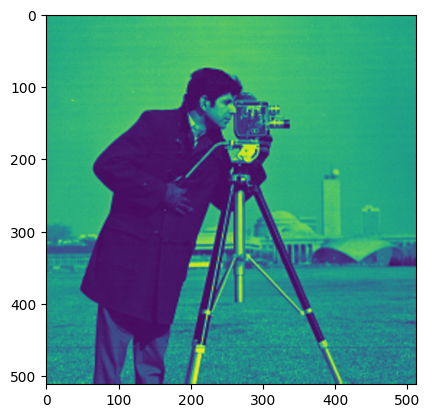

In [40]:
pcaimg=Image.open("/content/drive/MyDrive/BIG DATA/cameraman.png")
pca_arr=np.array(pcaimg)
plt.imshow(pca_arr)

In [42]:
centeredimg=pca_arr-np.mean(pca_arr)
cov_matrix=np.cov(centeredimg,rowvar=False)
print(cov_matrix)


[[543.51861775 520.97947881 492.56189228 ... 452.37668175 465.56655914
  469.92323569]
 [520.97947881 515.55188585 504.98165744 ... 438.16924535 451.13798771
  455.28722786]
 [492.56189228 504.98165744 514.61175621 ... 415.396557   428.0037075
  431.84547762]
 ...
 [452.37668175 438.16924535 415.396557   ... 694.40484344 701.46153376
  705.1383317 ]
 [465.56655914 451.13798771 428.0037075  ... 701.46153376 724.80795927
  732.40163283]
 [469.92323569 455.28722786 431.84547762 ... 705.1383317  732.40163283
  741.0831091 ]]


In [43]:
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

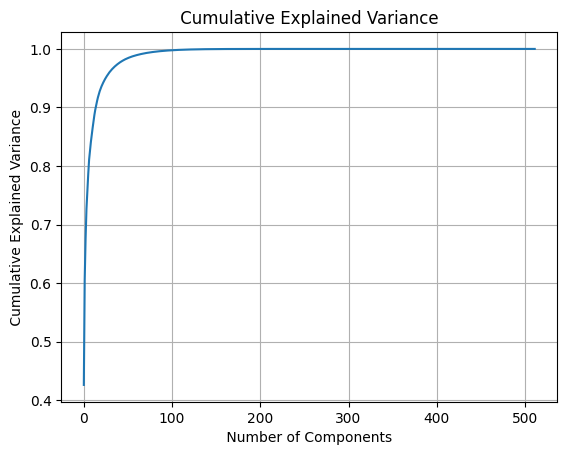

In [44]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [45]:
k=10
components = eigenvectors [: , : k ]

In [46]:
compressed_data = np . dot ( centeredimg , components )

In [47]:
decompressed_data = np . dot ( compressed_data , components . T ) + np.mean(pca_arr)

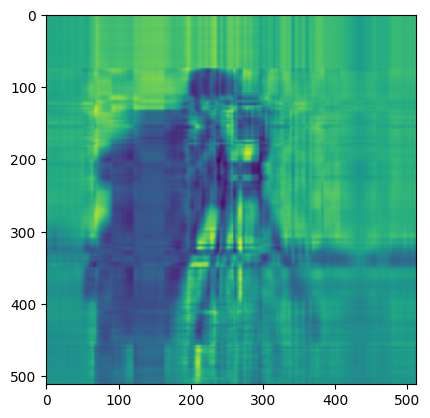

In [48]:
plt.imshow(decompressed_data)